# East African Immigrants to Canada

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this notebook, we will focus on the Canadian Immigration data.

The Dataset is Immigration to Canada from 1980 to 2013 - International migration flows to and fro -- for selected countries - The 2015 revision from United Nation's website. The dataset is in excel format, but here I, for convenience, have converted the dataset ito csv file and named it _canada.csv_.

First let us import important modules that we are sure are going to use in this notebook.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Let us open and read the dataset by looking at the first five items in the dataset.

In [2]:
df_can = pd.read_csv('canada.csv')
df_can.head()

,Unnamed: 0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,...,1450,1223,856,702,560,716,561,539,620,603
2,2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,...,0,0,1,0,0,0,0,0,0,0
4,4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,...,0,0,1,1,0,0,0,0,1,1


Let us see what the attributes are in our dataset

In [3]:
df_can.columns.values 

array(['Unnamed: 0', 'Type', 'Coverage', 'OdName', 'AREA', 'AreaName',
       'REG', 'RegName', 'DEV', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

Check the size, i.e (rows, columns), of the dataset

In [4]:
df_can.shape    

(195, 44)

## Cleaning the dataset

Let us clean the data set by removing uninformative columns using _drop()_ method

In [5]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage', 'Unnamed: 0'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns using rename() method by passing in a dictionary of old and new names as follows:

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

Let us add a 'Total' column that sums up the total immigrants by country over the period 1980 - 2013

In [7]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


It is worth checking if our dataset contains null object,  and this can be achived as follows

In [8]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

We can seek quick summary via describe() method

In [9]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


Let us set the index to be the names of the countries. Note here that the opposite of set is reset. In order to reset the index, we can use df_can.reset_index()

In [10]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In case you wanted to remove the name of the index we use

In [11]:
df_can.index.name = None

In [12]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Filtering African countries and East-African countries

Our interest in this notebook lies in analysing the flow of immigrants from East-Afica to Canada, therefore we need to filter the data into subdata that shows immigration from African countries (and later from East-Africa) to Canada. To do so we locate the countries, say Ethiopia for example as follows

In [13]:
# full row data (all columns)
print(df_can.loc['Ethiopia'])

# or alternatively
print(df_can.iloc[60])
print(df_can[df_can.index == 'Ethiopia'].T.squeeze())

Continent                Africa
Region           Eastern Africa
DevName      Developing regions
1980                         98
1981                         59
1982                         54
1983                         98
1984                        154
1985                        157
1986                        302
1987                        555
1988                        690
1989                       1096
1990                        890
1991                       1168
1992                       1876
1993                       1779
1994                       1204
1995                        870
1996                        999
1997                        739
1998                        563
1999                        678
2000                       1074
2001                       1062
2002                        818
2003                       1399
2004                       1535
2005                       1506
2006                       1801
2007                       1512
2008    

For later use in plotting let us map the columns, and also creat a list from years as: 

In [14]:
df_can.columns = list(map(str, df_can.columns))
#[print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

One way of filtering African countries is by setting condition to be met. We create the condition boolean series

In [15]:
condition = df_can['Continent'] == 'Africa'
print (condition)

Afghanistan                                             False
Albania                                                 False
Algeria                                                  True
American Samoa                                          False
Andorra                                                 False
Angola                                                   True
Antigua and Barbuda                                     False
Argentina                                               False
Armenia                                                 False
Australia                                               False
Austria                                                 False
Azerbaijan                                              False
Bahamas                                                 False
Bahrain                                                 False
Bangladesh                                              False
Barbados                                                False
Belarus 

We then pass the condition into the dataFrame

In [16]:
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Benin,Africa,Western Africa,Developing regions,2,5,4,3,4,3,6,...,95,116,183,205,238,290,284,391,397,2852
Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,2,...,7,11,8,28,15,42,53,64,76,396
Burkina Faso,Africa,Western Africa,Developing regions,2,1,3,2,3,2,7,...,91,147,136,139,162,186,144,269,322,2043
Burundi,Africa,Eastern Africa,Developing regions,0,0,0,0,1,2,1,...,626,468,614,448,566,529,604,684,480,8110
Cabo Verde,Africa,Western Africa,Developing regions,1,1,2,0,11,1,9,...,5,7,2,5,1,3,3,6,2,201
Cameroon,Africa,Middle Africa,Developing regions,9,2,16,7,8,13,11,...,604,697,1025,1279,1344,1800,1638,2507,2439,16021
Central African Republic,Africa,Middle Africa,Developing regions,4,3,1,0,0,0,0,...,49,18,30,28,19,26,18,45,169,550
Chad,Africa,Middle Africa,Developing regions,0,0,1,0,0,1,2,...,126,96,131,95,87,98,79,97,86,1653


Note that we can pass mutliple criteria in the same line. Now let's filter for AreaNAme = Africa and RegName = Eastern Africa. 

When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
don't forget to enclose the two conditions in parentheses

In [17]:
df_can[(df_can['Continent']=='Africa') & (df_can['Region']=='Eastern Africa')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Burundi,Africa,Eastern Africa,Developing regions,0,0,0,0,1,2,1,...,626,468,614,448,566,529,604,684,480,8110
Comoros,Africa,Eastern Africa,Developing regions,0,2,2,0,0,2,1,...,5,7,11,3,19,22,14,18,22,194
Djibouti,Africa,Eastern Africa,Developing regions,0,1,1,5,1,0,4,...,93,68,50,47,70,123,127,164,201,1646
Eritrea,Africa,Eastern Africa,Developing regions,0,0,0,0,0,0,0,...,528,700,699,799,904,931,1182,1335,1719,10450
Ethiopia,Africa,Eastern Africa,Developing regions,98,59,54,98,154,157,302,...,1506,1801,1512,1613,1289,1865,2163,1864,1606,35136
Kenya,Africa,Eastern Africa,Developing regions,291,296,221,201,218,245,244,...,693,622,449,453,489,507,585,725,664,17228
Madagascar,Africa,Eastern Africa,Developing regions,22,10,13,32,30,18,10,...,88,96,115,118,169,178,148,165,229,2194
Malawi,Africa,Eastern Africa,Developing regions,5,4,6,3,2,0,4,...,23,15,13,5,10,28,16,9,10,294
Mauritius,Africa,Eastern Africa,Developing regions,306,259,353,170,207,164,325,...,696,512,507,714,872,1455,1146,799,1203,15690
Mozambique,Africa,Eastern Africa,Developing regions,0,0,7,2,3,1,3,...,5,9,5,5,12,7,3,4,12,160


## Visualizing the result using Matplotlib

Let us now group countries by continents and apply sum() function, the output of the groupby method is a `groupby' object. We can not use it further until we apply a function (eg .sum())

In [18]:
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


To have a picture of our dataset by region, let us make now a pie chart of the share of immigration for each continents

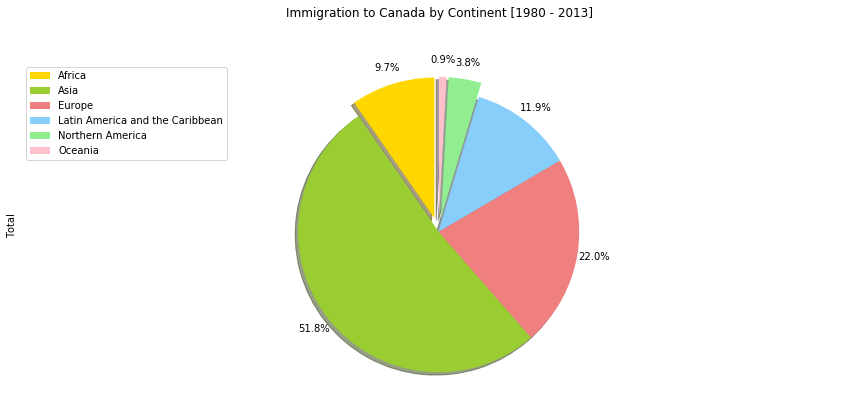

In [19]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

Before visualizing immigrants from Africa and/or East-Africa let us make a plot of the top 20 countries (based on the size of immigration to Canada)

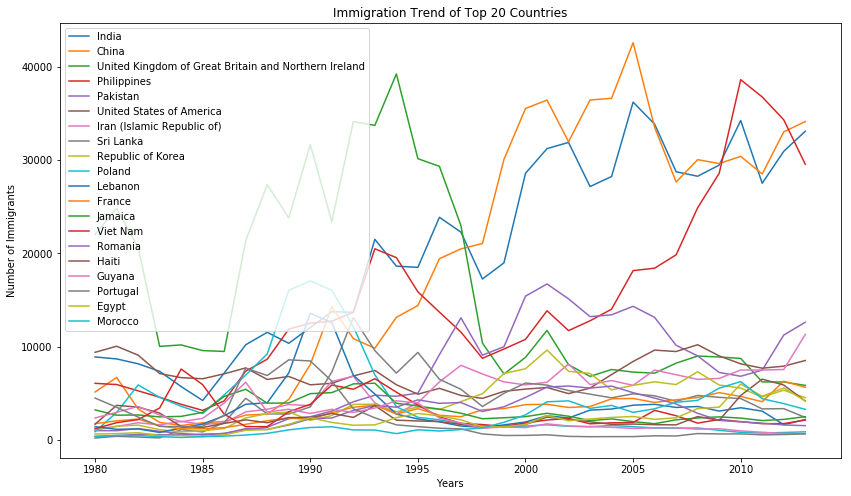

In [20]:
#inplace = True paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
# get the top 20 entries
df_top20 = df_can.head(20)
# transpose the dataframe
df_top20 = df_top20[years].transpose()
df_top20.index = df_top20.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top20.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 20 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

We can see from the plot that the contribution of African countries is small. Of the top 20 countries we have two African countries and none of which are sub-saharan country. 

As our interest lies in East-African countries let us filter some of the countries and see what the trend looks like.

In [21]:
df_EastAf = df_can.loc[['Ethiopia', 'Somalia','Eritrea','Sudan','Kenya','Djibouti','Uganda'], years]
df_EastAf.head(7)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Ethiopia,98,59,54,98,154,157,302,555,690,1096,...,1535,1506,1801,1512,1613,1289,1865,2163,1864,1606
Somalia,7,10,7,12,14,10,37,190,217,401,...,1364,1198,1061,1166,1015,1214,1528,1535,1582,2028
Eritrea,0,0,0,0,0,0,0,0,0,0,...,414,528,700,699,799,904,931,1182,1335,1719
Sudan,20,12,11,7,23,32,57,43,54,98,...,1823,1310,1039,683,622,422,612,531,444,343
Kenya,291,296,221,201,218,245,244,628,984,1140,...,685,693,622,449,453,489,507,585,725,664
Djibouti,0,1,1,5,1,0,4,2,4,6,...,67,93,68,50,47,70,123,127,164,201
Uganda,13,16,17,38,32,29,40,70,60,47,...,160,239,201,170,204,185,216,213,222,206


Poting the dataframe shows the following results

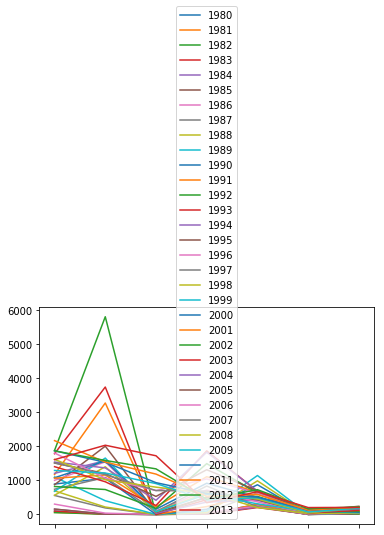

In [22]:

df_EastAf.plot(kind='line')

Let us fix the plots now. We got the above plots, because Pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since the index of dataframe is country with years as the columns, we must first fix this by transposing the dataframe using transpose() method thereby exchange the row and columns.

In [23]:
df_EastAf = df_EastAf.transpose()
df_EastAf.head()


,Ethiopia,Somalia,Eritrea,Sudan,Kenya,Djibouti,Uganda
1980,98,7,0,20,291,0,13
1981,59,10,0,12,296,1,16
1982,54,7,0,11,221,1,17
1983,98,12,0,7,201,5,38
1984,154,14,0,23,218,1,32


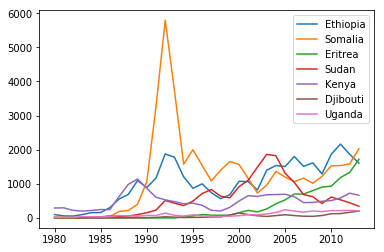

In [24]:
df_EastAf.index = df_EastAf.index.map(int) # let's change the index values of df_ESE to type integer for plotting
df_EastAf.plot(kind='line')



### Why peak in Somalia? 
From the plots we see a huge spike on the immigration from Somalia at the begining of 90s. This is because at the specified time there was cold war in Somalia forcing people to immigrate to differnet parts of the world, Canada being one of the popular destination. 

According to [Wiki_Somalia](https://en.wikipedia.org/wiki/Somali_Civil_War)
>Various armed factions began competing for influence in the power vacuum and turmoil that followed, particularly in the south. In 1990–92 customary law temporarily collapsed due to the fighting.This precipitated the arrival of UNOSOM I UN military observers in July 1992, followed by larger peacekeeping forces. Factional fighting continued in the south. In the absence of a central government, Somalia became a "failed state". The UN withdrew in 1995, having incurred significant casualties, but no central authority had yet been reestablished. After the collapse of the central government, there was some return to customary and religious law in most regions. In 1991 and 1998, two autonomous regional governments were also not established in the northern part of the country. This led to a relative decrease in the intensity of the fighting, with SIPRI removing Somalia from its list of major armed conflicts for the years 1997 and 1998.

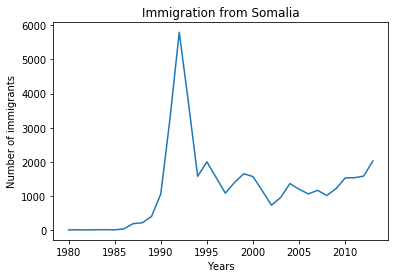

In [25]:

Somalia = df_can.loc['Somalia', years] # passing in years 1980 - 2013 to exclude the 'total' column
Somalia.head()
Somalia.index = Somalia.index.map(int) # let's change the index values of Ethio to type integer for plotting
Somalia.plot(kind='line')

plt.title('Immigration from Somalia')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

Furthermore we also see a spike in the immigration from Ethiopia, albeit small compared to the case of Somalia. Let us make the plots in a different mode than what we did for Somalia.

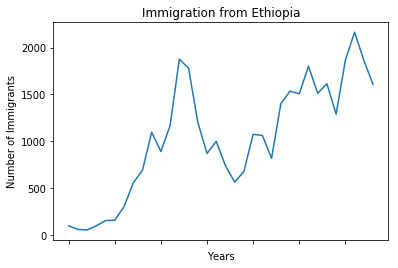

In [26]:
years = list(map(str, range(1980, 2014)))
df_can.loc['Ethiopia', years].plot(kind='line')

plt.title('Immigration from Ethiopia')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

To see the trend from Eastern-African countries, lets us make an area plot for selected countries from East-African countries

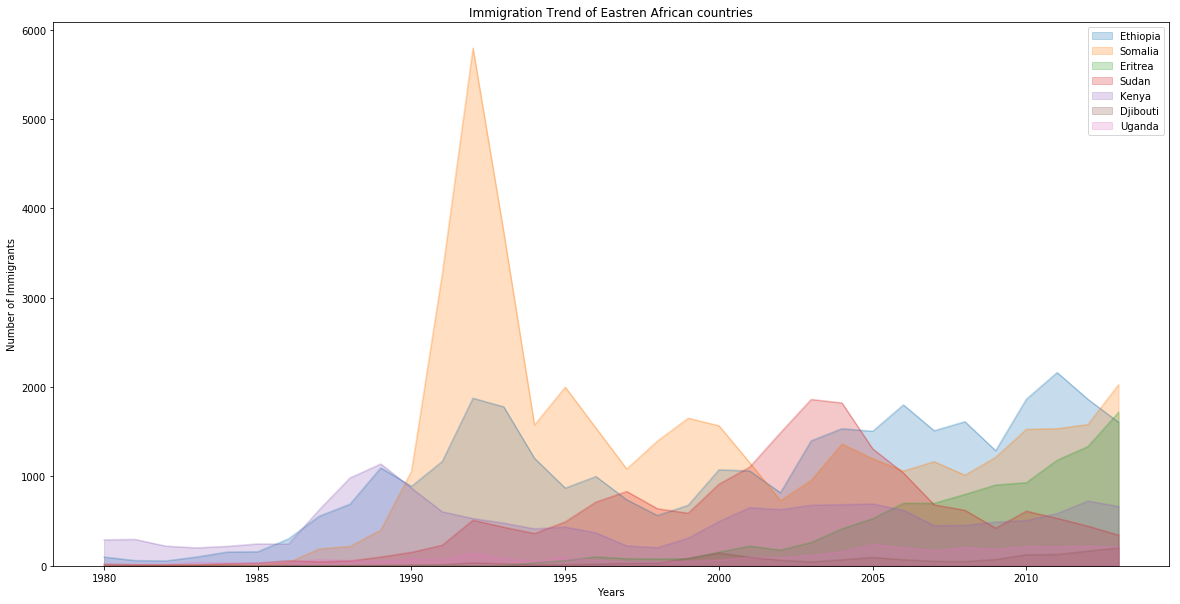

In [27]:


df_EastAf1 = df_can.loc[['Ethiopia', 'Somalia','Eritrea','Sudan','Kenya','Djibouti','Uganda'], years]

df_EastAf1 = df_EastAf1.transpose()

df_EastAf1.index = df_EastAf1.index.map(int) # let's change the index values of df_ESE to type integer for plotting
df_EastAf1.plot(kind='area', 
             alpha = 0.25,
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Eastren African countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

One point worth mentioning at this juncture is that we see from the plots that the immigration from Eritrea is zero untill 1993-94 and then begins to rise. The explanation for this is that untill 1993 (when referendum on independece held) Eritrea was part of Ethiopia, though it internationally was recognized on 1993 as an independent state, it was free since the fall of the Derg regime in Ethiopia in 1991.

According to [wiki_Eritrea](https://en.wikipedia.org/wiki/Eritrea)

>The creation of modern-day Eritrea is a result of the incorporation of independent, distinct kingdoms and sultanates (for example, Medri Bahri and the Sultanate of Aussa) eventually resulting in the formation of Italian Eritrea. After the defeat of the Italian colonial army in 1942, Eritrea was administered by the British Military Administration until 1952. Following the UN General Assembly decision, in 1952, Eritrea would govern itself with a local Eritrean parliament but for foreign affairs and defense it would enter into a federal status with Ethiopia for a period of 10 years. However, in 1962 the government of Ethiopia annulled the Eritrean parliament and formally annexed Eritrea. But the Eritreans that argued for complete Eritrean independence since the ouster of the Italians in 1941, anticipated what was coming and in 1960 organized the Eritrean Liberation Front in opposition. In 1991, after 30 years of continuous armed struggle for independence, the Eritrean liberation fighters entered the capital city, Asmara, in victory.

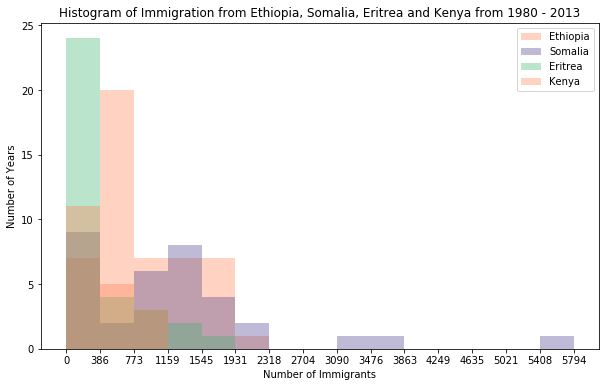

In [28]:

df_ESEK = df_can.loc[['Ethiopia', 'Somalia', 'Eritrea','Kenya'], years]

df_ESEK = df_ESEK.transpose()
## let's get the x-tick values
count, bin_edges = np.histogram(df_ESEK, 15)
## Un-stacked Histogram
df_ESEK.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )
plt.title('Histogram of Immigration from Ethiopia, Somalia, Eritrea and Kenya from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

To see number of imigrants for each year we use the bar plot as follows

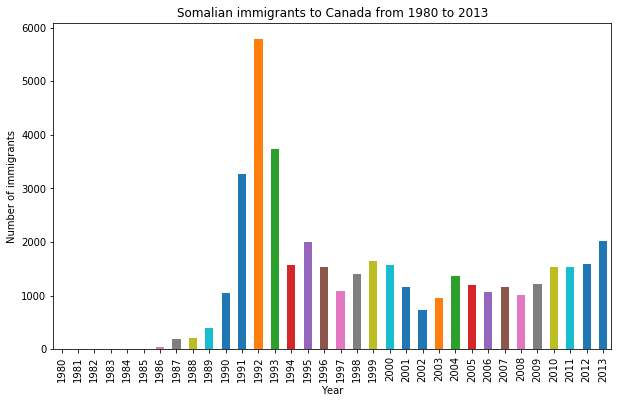

In [29]:
# obtain data
df_Somalia = df_can.loc['Somalia', years]
# visualize data
df_Somalia.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Somalian immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()


As a tip we can annotate arrow indicating the hike in immigration, which in this case happen to be in 1992 for Somalia

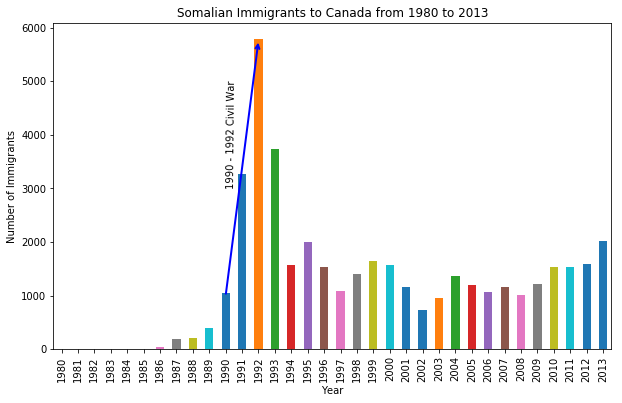

In [30]:
df_Somalia.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Somalian Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(12, 5760),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(10, 1000),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('1990 - 1992 Civil War', # text to display
             xy=(10, 3000),                    # start the text at at point (year 2008 , pop 30)
             rotation=89.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

We xan repaet the process for another country, say Ethiopia, to identify the two peaks we have observed earlier

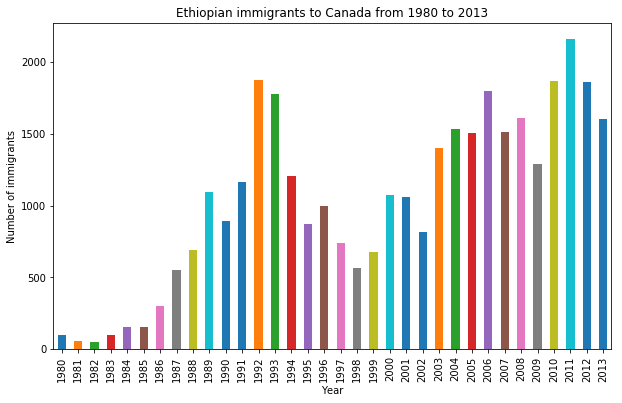

In [31]:
# retrieve the data
df_Ethiopia = df_can.loc['Ethiopia', years]
#  plot data
df_Ethiopia.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Ethiopian immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

We see, more or less, three peaks for this case, i.e 1992-93, 2006 and , 2011. This years seems to coincide with three of political incidents. The 1992-93 is likely the result of change of regime as the Dergue regime has fallen in 1991 there was uncertainity in the country and several people left following the change. 

In 2005 Ethiopia held a very tense and controversial election that resulted the death of 200 young protesters. The protest is the result of alleged voting irregularities and disagreemnet of the election result, following which there was crackdown by governmnet and riot. Several youth left the country, for fear of arrest, to neighborhood countries and then to western contries Canada being one of those destination.

I reiterate that the above mentioned causes by no means are the sole reasons for spike in the number of immigrants from Ethiopia to Canada, yet is is safe to assume they play larger role as cause of the influx. The 2011 hike needs further investigation, but it could be combination of several reason.

Let us normalize the dataframe as follows and we will see the immigration from Ethiopia, Eritrea, and Somalia specifically.

In [32]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Normalization can be done as

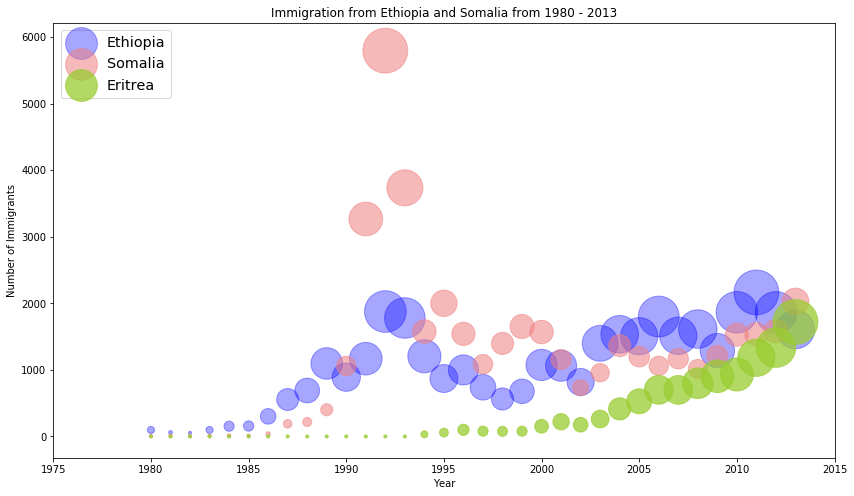

In [33]:
#colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# normalize Ethiopia data
norm_Ethiopia = (df_can_t['Ethiopia'] - df_can_t['Ethiopia'].min()) / (df_can_t['Ethiopia'].max() - df_can_t['Ethiopia'].min())

# normalize Somalia data
norm_Somalia = (df_can_t['Somalia'] - df_can_t['Somalia'].min()) / (df_can_t['Somalia'].max() - df_can_t['Somalia'].min())

# normalize Eritrea data
norm_Eritrea = (df_can_t['Eritrea'] - df_can_t['Eritrea'].min()) / (df_can_t['Eritrea'].max() - df_can_t['Eritrea'].min())


# Ethiopia
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Ethiopia',
                    figsize=(14, 8),
                    alpha=0.35,                  # transparency
                    color='blue',
                    s=norm_Ethiopia * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
 # Somalia
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Somalia',
                    alpha=0.55,
                    color="lightcoral",
                    s=norm_Somalia * 2000 + 10,
                    ax = ax0
                   )
# Eritrea
ax2 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Eritrea',
                    alpha=0.75,
                    color="yellowgreen",
                    s=norm_Eritrea * 2000 + 10,
                    ax = ax0
                   )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Ethiopia and Somalia from 1980 - 2013')
ax0.legend(['Ethiopia', 'Somalia', 'Eritrea'], loc='upper left', fontsize='x-large')

### Immigration from African regions

Although we focused on the imigration from East Africa, and specifically horn Africa, let us see the contribution of the region as compared to other regions to see the proportion

In [34]:
African_countries = df_can[df_can["Continent"] == "Africa"]
# group countries by region and apply sum() function 
Africa_Regions = African_countries.groupby('Region', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(African_countries.groupby('Region', axis=0)))

Africa_Regions.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Region,,,,,,,,,,,,,,,,,,,,,
Eastern Africa,1471,1641,1426,1094,1187,1134,1454,2734,3237,4094,...,7083,6750,6669,6705,6922,8591,8956,8846,9448,167389
Middle Africa,33,27,44,32,42,30,61,100,91,119,...,2802,2834,2951,3034,3255,3369,3146,4602,5005,48628
Northern Africa,1100,1268,1348,936,842,840,1115,1864,2239,3574,...,11323,12705,11750,13456,16320,19271,15712,15453,13982,255451
Southern Africa,1041,1126,791,387,297,327,725,1480,1329,1319,...,1012,1148,1230,1184,1235,1306,1049,1348,1444,41579
Western Africa,306,301,210,222,271,319,427,1316,656,788,...,5303,5751,5684,5511,6802,8355,6578,7834,8664,105901


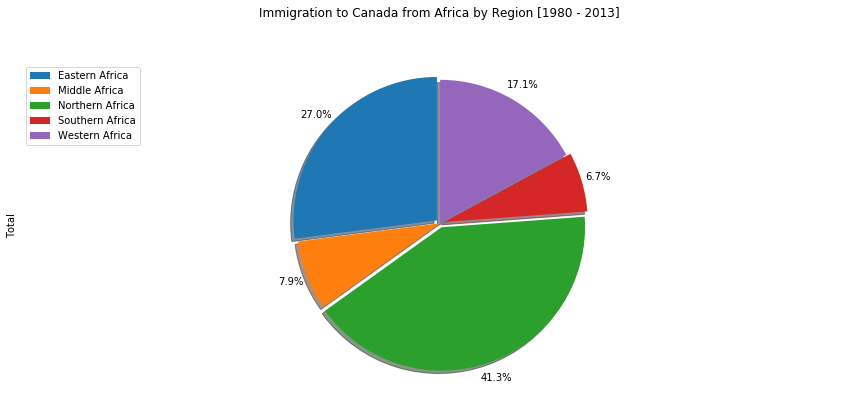

In [35]:
colors_list = ['gold', 'yellowgreen', 'lightgreen', 'lightskyblue', 'lightcoral']
explode_list = [0.03, 0.0, 0.03, 0.03,0.0] # ratio for each region with which to offset each wedge.

Africa_Regions['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada from Africa by Region [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=Africa_Regions.index, loc='upper left') 

plt.show()

We see from the plot that East-Africa  is the second following Northern part of Africa

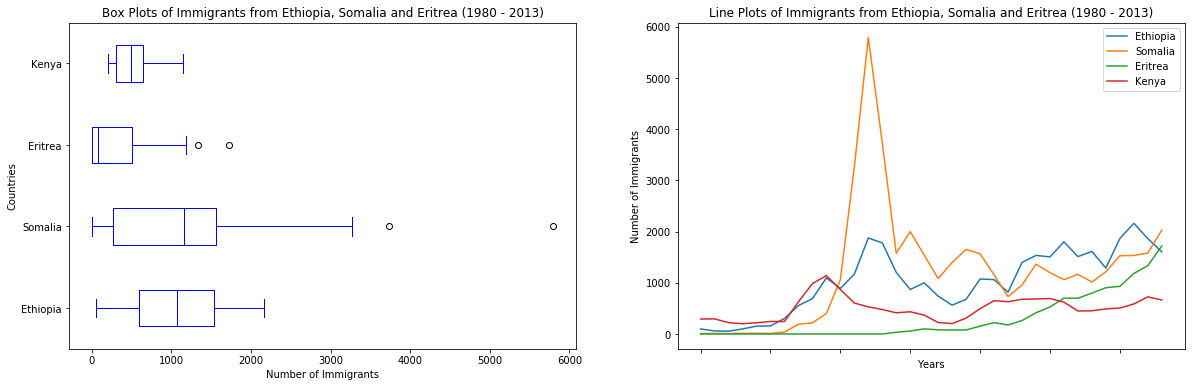

In [36]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_ESEK.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from Ethiopia, Somalia and Eritrea (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_ESEK.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from Ethiopia, Somalia and Eritrea (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

### Can we predict future immigration from Africa

Although we can not confidently use the following calculation as prediction, as we haven't taken several causes into account. We can, however, touch here how we could do the calculations to predict future immigrations by obtaining the intercept and slope, and then fiting a line of polynomial degree 1 as done below

In [37]:
# we can use the sum() method to get the total population per year
df_afrctot = pd.DataFrame(African_countries[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_afrctot.index = map(int, df_afrctot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_afrctot.reset_index(inplace = True)

# rename columns
df_afrctot.columns = ['year', 'total']

# view the final dataframe
df_afrctot.head()

,year,total
0,1980,3951
1,1981,4363
2,1982,3819
3,1983,2671
4,1984,2639


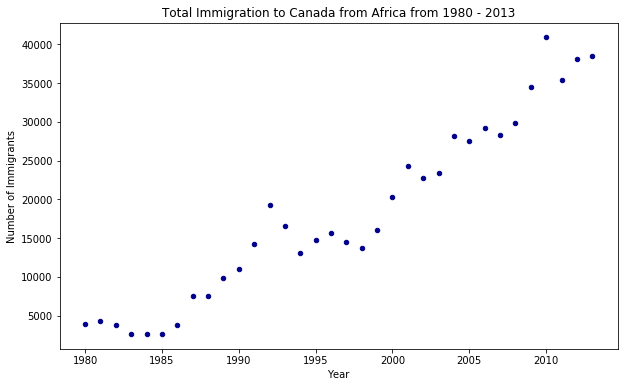

In [38]:
df_afrctot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from Africa from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [39]:
x = df_afrctot['year']      # year on x-axis
y = df_afrctot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 1.13626677e+03, -2.25035225e+06])

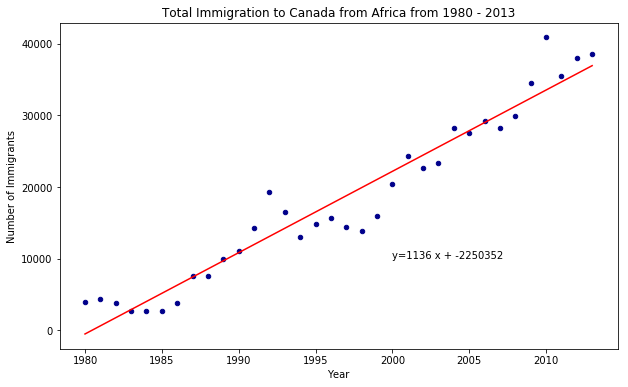

'No. Immigrants = 1136 * Year + -2250352'

In [40]:
df_afrctot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from Africa from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 10000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in a year, for 2016 for example we estimate:

>No_of_immigrants = 1136 * Year - 2250352   
>No_of_immigrants = 1136 * 2016 - 2250352   
>No_of_immigrants = 39824   

But it is worth mentioning that the fit is not optimized and hence needs modification which we plan to do in the future, the above calculation is just a rough example of showing projection of immigration.

# Conclusion

We have done analysis on the immigration from Horn-African countries to Canada, we observed that Somalia and Ethiopia had peak immigration on the year 1992-93, which happens to be the consequnce of regime change in Ethiopia and failing state in Somalia. 

We observed another peak in Ethiopia that seems to coincide with the controversial election it held. The sudden increase in immigration Eritrea, from zero , is aligned with the time it got its independence.

## Further work

It will be informative to have a closer look at the reason behind the 2011 peak of Ethiopian immigrants.

The sucess, or lack thereof, these immigrants in their newly adapted country.

Map where each immigrants are concenterated in Canad, for example see if there is any correlation between the imigrants origin and where they live etc



This notebook was created by [Dawit H. Hailu (PhD)](https://www.linkedin.com/in/dawit-h-hailu-ph-d-4b7b8787/)